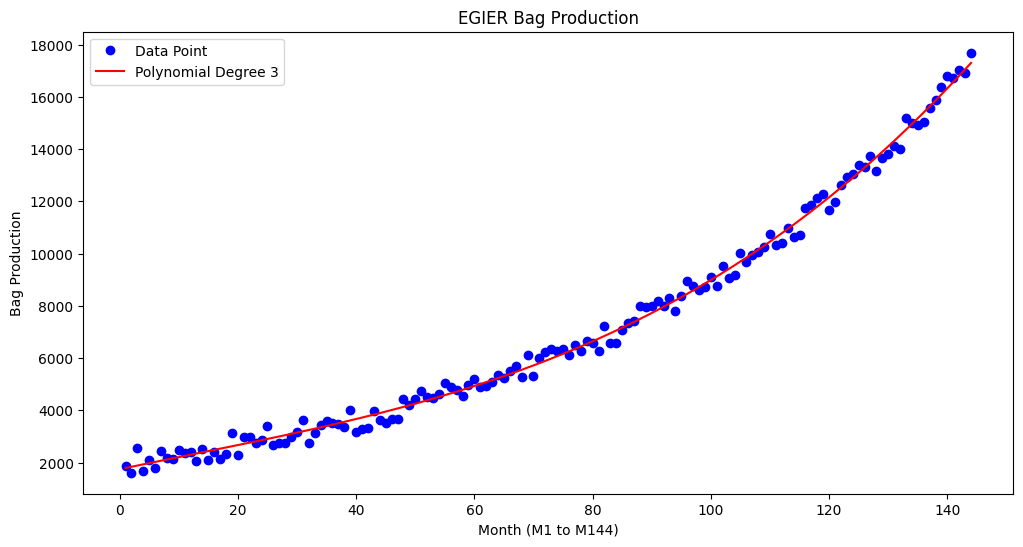

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = 'aol_data.csv' 
df = pd.read_csv(file_path, header=None)

y = df.iloc[1].values.astype(float)
x = np.arange(1, len(y) + 1)

degree = 3
coeffs = np.polyfit(x, y, degree)

trend_model = np.poly1d(coeffs)

x_fit = np.linspace(1, 144, 300)
y_fit = trend_model(x_fit)

plt.figure(figsize=(12, 6))
plt.plot(x, y, 'bo', label='Data Point')
plt.plot(x_fit, y_fit, 'r-', label=f'Polynomial Degree {degree}')
plt.xlabel('Month (M1 to M144)')
plt.ylabel('Bag Production')
plt.title('EGIER Bag Production')
plt.legend()
plt.show()


In [55]:
print("Polynomial model:")
print(trend_model)

y_predicted = trend_model(x)

percentage_errors = np.abs((y - y_predicted) / y) * 100
average_accuracy = 100 - np.mean(percentage_errors)

for i in range(144):  
    print(f"Month {i+1}: Actual = {y[i]:.3f}, Predicted = {y_predicted[i]:.3f}, Error = {percentage_errors[i]:.3f}%")

print(f"\nOverall Average Accuracy of Model: {average_accuracy:.3f}%")

Polynomial model:
          3          2
0.003863 x - 0.1344 x + 47.22 x + 1749
Month 1: Actual = 1863.000, Predicted = 1795.600, Error = 3.618%
Month 2: Actual = 1614.000, Predicted = 1842.447, Error = 14.154%
Month 3: Actual = 2570.000, Predicted = 1889.072, Error = 26.495%
Month 4: Actual = 1685.000, Predicted = 1935.498, Error = 14.866%
Month 5: Actual = 2101.000, Predicted = 1981.748, Error = 5.676%
Month 6: Actual = 1811.000, Predicted = 2027.846, Error = 11.974%
Month 7: Actual = 2457.000, Predicted = 2073.813, Error = 15.596%
Month 8: Actual = 2171.000, Predicted = 2119.674, Error = 2.364%
Month 9: Actual = 2134.000, Predicted = 2165.452, Error = 1.474%
Month 10: Actual = 2502.000, Predicted = 2211.170, Error = 11.624%
Month 11: Actual = 2358.000, Predicted = 2256.851, Error = 4.290%
Month 12: Actual = 2399.000, Predicted = 2302.518, Error = 4.022%
Month 13: Actual = 2048.000, Predicted = 2348.194, Error = 14.658%
Month 14: Actual = 2523.000, Predicted = 2393.903, Error = 5.117

In [56]:
def f(x):
    return 0.003863 * x**3 - 0.1344 * x**2 + 47.22 * x + 1749

def root_equation(x):
    return f(x) - 25000

def bisection(a, b, tol=0.01, max_iter=1000):
    if root_equation(a) * root_equation(b) >= 0:
        print("Bisection method fails: no sign change.")
        return None

    for i in range(max_iter):
        c = (a + b) / 2
        print(f"Iteration {i}: x = {c:.6f}, f(x) = {f(c):.3f}")
        if abs(root_equation(c)) < tol:
            return c
        elif root_equation(a) * root_equation(c) < 0:
            b = c
        else:
            a = c
    return (a + b) / 2 

print(f"Production surpasses 25,000 at month: {bisection(144, 300)}")


Iteration 0: x = 222.000000, f(x) = 47873.339
Iteration 1: x = 183.000000, f(x) = 29563.684
Iteration 2: x = 163.500000, f(x) = 22760.758
Iteration 3: x = 173.250000, f(x) = 25984.131
Iteration 4: x = 168.375000, f(x) = 24329.265
Iteration 5: x = 170.812500, f(x) = 25145.735
Iteration 6: x = 169.593750, f(x) = 24734.780
Iteration 7: x = 170.203125, f(x) = 24939.575
Iteration 8: x = 170.507812, f(x) = 25042.484
Iteration 9: x = 170.355469, f(x) = 24990.987
Iteration 10: x = 170.431641, f(x) = 25016.725
Iteration 11: x = 170.393555, f(x) = 25003.854
Iteration 12: x = 170.374512, f(x) = 24997.420
Iteration 13: x = 170.384033, f(x) = 25000.636
Iteration 14: x = 170.379272, f(x) = 24999.028
Iteration 15: x = 170.381653, f(x) = 24999.832
Iteration 16: x = 170.382843, f(x) = 25000.234
Iteration 17: x = 170.382248, f(x) = 25000.033
Iteration 18: x = 170.381950, f(x) = 24999.933
Iteration 19: x = 170.382099, f(x) = 24999.983
Iteration 20: x = 170.382174, f(x) = 25000.008
Production surpasses 25